In [1]:
import sys
sys.path.append("../../build-libs-Desktop-Debug/core/wrappers/python")  # set to correct path for module"
import rtbotpy

In [2]:
import pandas as pd
import numpy as np
dir="../data/label"
name="CF68BF40-ABB1-4DA7-985D-233961881550"#"3BCA2378-6422-440D-B6C8-6F4B96FEA93C"#
ppg=np.loadtxt(f"{dir}/{name}.csv", skiprows=1, delimiter=',')
dataL=pd.read_table(f"{dir}/{name}-labels.csv")
peakL = np.asarray(dataL['SP'], dtype='int64')

In [10]:
import json
with open('../data/label/ppg.json', 'r') as f:
  prog = json.load(f)

msgs=[rtbotpy.Message(int(t),-v) for t,v in ppg]
pipe=rtbotpy.Pipeline(json.dumps(prog))
peak=[]
for msg in msgs:
    out=pipe.receiveDebug(msg)
    if (out.get("o1")): 
        msg=out.get("o1")[0]
        peak += [[msg.time,msg.value]]
peak=np.array(peak)  

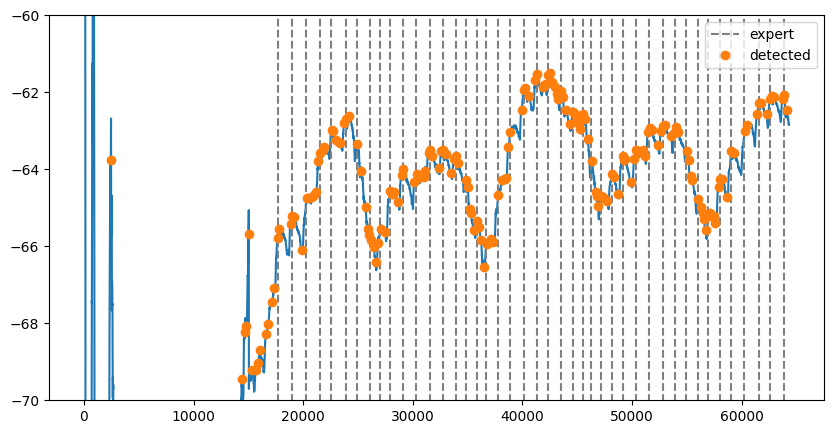

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5),dpi=100)
plt.plot([msg.time for msg in msgs], [msg.value for msg in msgs])
plt.vlines(peakL,-80,-40, linestyles='--', color="gray", label="expert" )
plt.plot(peak[:,0], peak[:,1], 'o', label="detected")
plt.ylim(-70,-60)
plt.legend()

In [17]:
s1=rtbotpy.Sample(msgs,peakL)
cost=rtbotpy.CostFuncion(json.dumps(prog),[s1])
xs=np.linspace(500, cost.paramsData[0].upper, 21)
ys=[cost([x]) for x in xs]

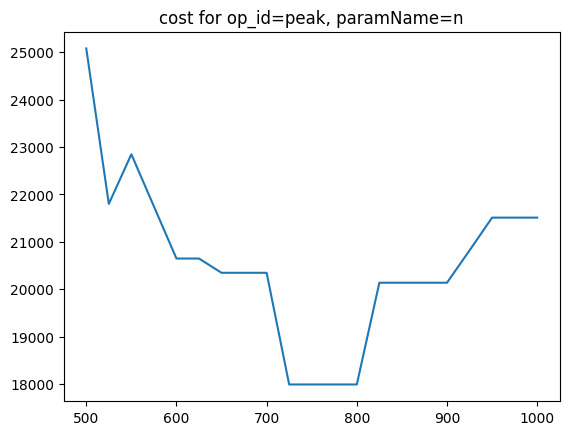

In [19]:
plt.title(label=f'cost for op_id={cost.paramsData[0].op_id}, paramName={cost.paramsData[0].paramName}')
plt.plot(xs, ys)